In [10]:
!pip install wordcloud

In [20]:
#Импортируем все необходимые библиотеки
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#Загрузим датафрейм из файла
df = pd.read_csv('/content/fake_news.csv')

In [3]:
#Получим кол-во новостей каждого типа и отобразим сравнение на графике
i = df.label.value_counts()

In [4]:
fig = go.Figure(data=[go.Bar(
            x=['Real','Fake'], y=i,
            text=i,
            textposition='auto',
        )])

fig.show()
#Как можно увидеть, датасет содержит примерно одиноковое кол-во и реальных и фейковых новостей

In [5]:
#Разбиваем данные на обучающие и тестовые
X_train,X_test,y_train,y_test = train_test_split(df['text'], df.label, test_size=0.2, random_state=7)

In [6]:
# Получим векторные представления текстов
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [7]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [11]:
print(tfidf_train.shape)
print(tfidf_test.shape)

(5068, 61651)
(1267, 61651)


In [25]:
#Создаем модель с помощью PAC
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [26]:
#Проверяем модель на тестовых данных
y_pred = pac.predict(tfidf_test)

In [29]:
#Выводим точность предсказания модели
score = accuracy_score(y_test,y_pred)
print('Точность: %.2f%%' % (score * 100))

Точность: 92.90%


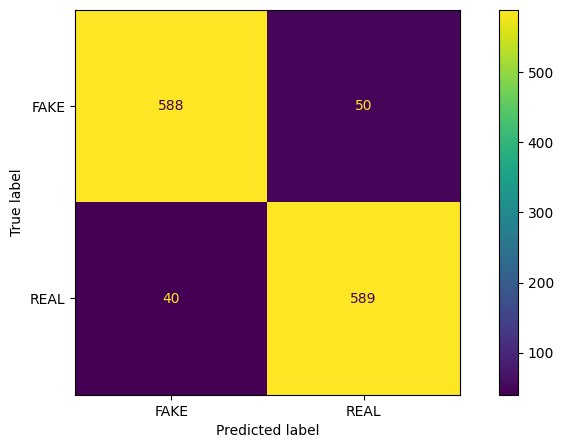

In [30]:
#Построим матрицу ошибок
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)

In [39]:
print('\n Clasification report:\n', classification_report(y_test,y_pred))


 Clasification report:
               precision    recall  f1-score   support

        FAKE       0.94      0.92      0.93       638
        REAL       0.92      0.94      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [ ]:
#Проверим модель на произвольных данных не из датасета
ii=['This is a really important question, Lambert says. “I don’t want to be passed along to two or three people,” she says. “I want one person to contact.” There may be specific contact points for different areas, she adds, such as the director of nursing for related questions. However, “I want to know that I can pop into the executive director’s office anytime, ask any question and make any kind of complaint,” she emphasizes. “I want to know that person is available. Because sometimes, you have to go up to that level.""']

In [ ]:
ii= tfidf_vectorizer.transform(ii)

In [ ]:
y_pred=pac.predict(ii)

In [ ]:
y_pred

array(['REAL'], dtype='<U4')